In [2]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [3]:
images = ['data/img_450.jpg', 'data/img_008.jpg', 'data/img_071.jpg', 
          'data/img_206.jpg', 'data/img_293.jpg', 'data/img_352.jpg']

In [28]:
img = cv2.imread('data/img_450.jpg')

In [ ]:
d = pytesseract.image_to_data(img, lang='rus+eng', output_type=pytesseract.Output.DICT)

In [10]:
def is_box_in(box1, box2):
    """
    check if box1 is in box2
    """
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    return (x1 >= x2) and (y1 >= y2) and (x1 + w1 <= x2 + w2) and (y1 + h1 <= y2 + h2)

In [11]:
boxes = []
for i in range(len(d['level'])):
    if d['level'][i] == 4:  # bounding box of text line
        box = {'text': '', 'bbox': [d['left'][i],
                                    d['top'][i], d['width'][i], d['height'][i]]}
        boxes.append(box)
for i in range(len(d['level'])):
    if d['level'][i] == 5:  # bounding box of some word
        box = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
        for j in range(len(boxes)):
            if is_box_in(box, boxes[j]['bbox']):
                if boxes[j]['text'] != '':
                    boxes[j]['text'] += ' '
                boxes[j]['text'] += d['text'][i]

In [12]:
boxes

[{'text': ' ', 'bbox': [0, 0, 487, 221]},
 {'text': 'РЕСПУБЛИКИ АДЫГЕЯ', 'bbox': [149, 229, 312, 17]},
 {'text': 'АДЫГЭ РЕСПУБЛИКЭМ И', 'bbox': [148, 259, 314, 18]},
 {'text': 'ЗАКОН', 'bbox': [254, 279, 101, 13]},
 {'text': 'О ВНЕСЕНИИ ИЗМЕНЕНИЙ В ЗАКОН РЕСПУБЛИКИ АДЫГЕЯ',
  'bbox': [95, 325, 424, 13]},
 {'text': '"О ПОЖАРНОЙ БЕЗОПАСНОСТИ В РЕСПУБЛИКЕ АДЫГЕЯ"',
  'bbox': [101, 341, 413, 14]},
 {'text': '"Принят Государотвенным Советом - Хас» Республики Алытея',
  'bbox': [131, 389, 352, 13]},
 {'text': '26 сентября 2017 ода', 'bbox': [246, 405, 123, 12]},
 {'text': 'Статья 1. О впесеции номененый в Заков Республики Алыси  ',
  'bbox': [114, 451, 421, 11]},
 {'text': '"О пожарной безопаспости в Респубянкс Адыгеи"  ',
  'bbox': [195, 466, 300, 12]},
 {'text': 'Внести в Закон Республики Адыгея от 10 августа 2006 года №20 "О т',
  'bbox': [114, 481, 421, 12]},
 {'text': 'жарной безопасности в Республике Адыгея" (Собрание законодательства Pec-  ',
  'bbox': [81, 496, 455, 13]},
 {'text': '

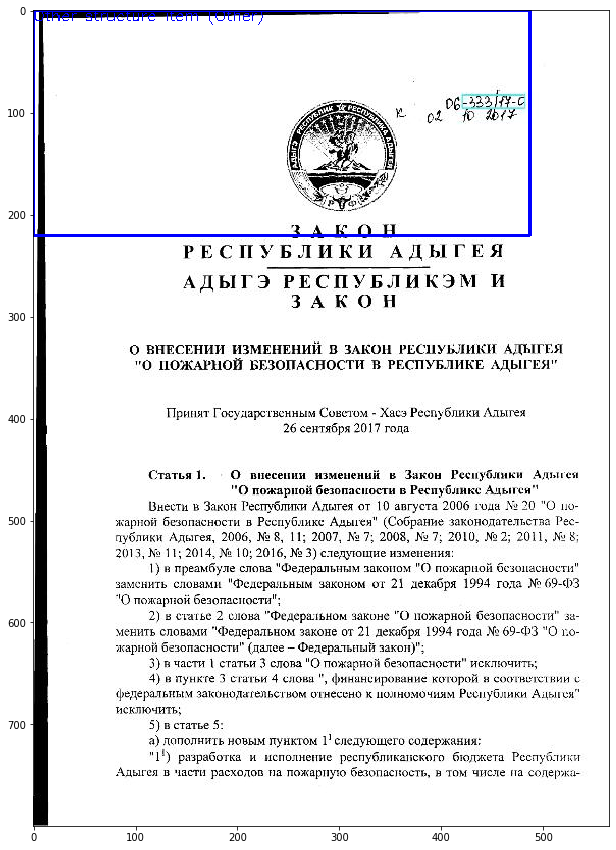

In [29]:
x, y, w, h = 0, 0, 487, 221
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
cv2.putText(img, 'Other structure item (Other)', 
                        (x, y+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 
                        (0, 0, 255), 1)
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.show()

In [30]:
cv2.imwrite('wrong/img_450.jpg', img)

True